In [2]:
import pandas as pd

In [5]:
df = pd.read_csv(r"E:\proj\Amazon_Vine_Analysis\vine_table.csv")
df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,R3DT59XH7HXR9K,5.0,0.0,0.0,N,Y
1,R1LFS11BNASSU8,5.0,0.0,1.0,N,Y
2,R296RT05AG0AF6,5.0,0.0,0.0,N,Y
3,R3V37XDZ7ZCI3L,5.0,0.0,1.0,N,Y
4,R14GU232NQFYX2,5.0,0.0,0.0,N,Y


In [6]:
df = df.loc[(df.total_votes>20)]
df.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
233,R3FB6BERWPEIJP,4.0,40.0,43.0,N,Y
615,R1D4Z38STRDQXK,5.0,53.0,56.0,N,Y
1065,R1XMWJZICINIFX,3.0,20.0,21.0,N,Y
1105,R20QKY1GABXFLM,1.0,272.0,297.0,N,Y
1434,R3GZ7CK2O1PPG0,2.0,10.0,30.0,N,Y


In [7]:
df_new = df.loc[(df.helpful_votes/df.total_votes>=0.5)]
df_new.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
233,R3FB6BERWPEIJP,4.0,40.0,43.0,N,Y
615,R1D4Z38STRDQXK,5.0,53.0,56.0,N,Y
1065,R1XMWJZICINIFX,3.0,20.0,21.0,N,Y
1105,R20QKY1GABXFLM,1.0,272.0,297.0,N,Y
1538,R3DH22AA5WGLLS,5.0,30.0,30.0,N,N


In [8]:
df_paid = df_new.loc[(df_new.vine == 'Y')]
df_paid.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
13470,R1Z71RW4J9IK93,5.0,20.0,22.0,Y,N
18140,R3FVB5QI11KI9Q,4.0,192.0,200.0,Y,N
20156,R2G027YBMVXV6Y,5.0,39.0,48.0,Y,N
26393,R1QGBAN7BMGWRR,5.0,121.0,129.0,Y,N
57508,R2YVVJ9NOPNX50,4.0,36.0,41.0,Y,N


In [9]:
df_unpaid = df_new.loc[(df_new.vine == 'N')]
df_unpaid.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
233,R3FB6BERWPEIJP,4.0,40.0,43.0,N,Y
615,R1D4Z38STRDQXK,5.0,53.0,56.0,N,Y
1065,R1XMWJZICINIFX,3.0,20.0,21.0,N,Y
1105,R20QKY1GABXFLM,1.0,272.0,297.0,N,Y
1538,R3DH22AA5WGLLS,5.0,30.0,30.0,N,N


In [10]:
df_paid.describe()

,star_rating,helpful_votes,total_votes
count,1160.000000,1160.000000,1160.000000
mean,4.011207,93.922414,101.973276
std,1.080398,184.685225,192.800514
min,1.000000,13.000000,21.000000
25%,3.000000,25.000000,29.000000
50%,4.000000,43.000000,48.000000
75%,5.000000,85.000000,95.000000
max,5.000000,3325.000000,3428.000000


In [11]:
df_unpaid.describe()

,star_rating,helpful_votes,total_votes
count,92308.000000,92308.000000,92308.000000
mean,3.542846,65.160365,70.655404
std,1.646752,151.335935,157.556732
min,1.000000,11.000000,21.000000
25%,2.000000,23.000000,26.000000
50%,4.000000,33.000000,36.000000
75%,5.000000,58.000000,63.000000
max,5.000000,11173.000000,11501.000000


In [32]:
df_paid_count=df_paid.groupby("star_rating")["review_id"].count().reset_index()
df_paid_count

,star_rating,review_id
0,1.0,42
1,2.0,68
2,3.0,214
3,4.0,347
4,5.0,489


In [33]:
df_unpaid_count=df_unpaid.groupby("star_rating")["review_id"].count().reset_index()
df_unpaid_count

,star_rating,review_id
0,1.0,21201
1,2.0,6855
2,3.0,8133
3,4.0,12872
4,5.0,43247


<AxesSubplot:xlabel='star_rating'>

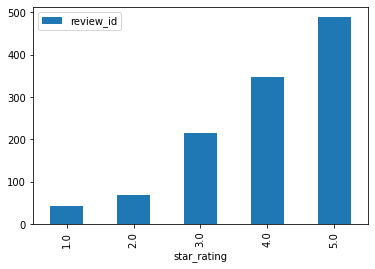

In [35]:
df_paid_count.plot.bar(x="star_rating")

<AxesSubplot:xlabel='star_rating'>

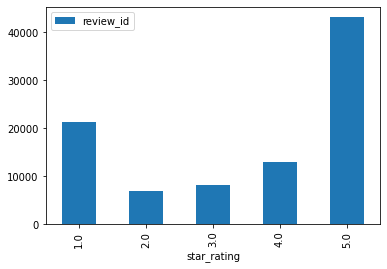

In [36]:
df_unpaid_count.plot.bar(x="star_rating")

In [39]:
df_paid_count["percentage"]=df_paid_count.review_id/df_paid_count.review_id.sum()
df_paid_count

,star_rating,review_id,percentage
0,1.0,42,0.036207
1,2.0,68,0.058621
2,3.0,214,0.184483
3,4.0,347,0.299138
4,5.0,489,0.421552


In [41]:
df_unpaid_count["percentage"]=df_unpaid_count.review_id/df_unpaid_count.review_id.sum()
df_unpaid_count

,star_rating,review_id,percentage
0,1.0,21201,0.229677
1,2.0,6855,0.074262
2,3.0,8133,0.088107
3,4.0,12872,0.139446
4,5.0,43247,0.468508
